In [1]:
!pip install pandas-datareader
!pip install tensorflow

In [2]:
import pandas_datareader as pdr

# Retrieve data using Pandas DataReader with the API key provided directly
df = pdr.get_data_tiingo('GOOG', api_key="cd979b3785f284399d665e0f55251c969f818226")


C:\Users\KIIT\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('GOOG.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('GOOG.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2019-04-09 00:00:00+00:00,1197.25,1202.290,1193.080,1196.00,876381,59.8625,60.11450,59.65400,59.800,17527620,0.0,1.0
1,GOOG,2019-04-10 00:00:00+00:00,1202.16,1203.785,1196.435,1200.68,724643,60.1080,60.18925,59.82175,60.034,14492860,0.0,1.0
2,GOOG,2019-04-11 00:00:00+00:00,1204.62,1207.960,1200.130,1203.96,710231,60.2310,60.39800,60.00650,60.198,14204620,0.0,1.0
3,GOOG,2019-04-12 00:00:00+00:00,1217.87,1218.350,1208.110,1210.00,933794,60.8935,60.91750,60.40550,60.500,18675880,0.0,1.0
4,GOOG,2019-04-15 00:00:00+00:00,1221.10,1224.200,1209.110,1218.00,1187519,61.0550,61.21000,60.45550,60.900,23750380,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOG,2024-04-01 00:00:00+00:00,156.50,157.00,151.6500,151.83,24416137,156.50,157.00,151.6500,151.83,24416137,0.0,1.0
1253,GOOG,2024-04-02 00:00:00+00:00,155.87,155.99,153.4600,154.75,17549140,155.87,155.99,153.4600,154.75,17549140,0.0,1.0
1254,GOOG,2024-04-03 00:00:00+00:00,156.37,156.55,154.1321,154.92,16984168,156.37,156.55,154.1321,154.92,16984168,0.0,1.0
1255,GOOG,2024-04-04 00:00:00+00:00,151.94,156.18,151.8800,155.08,23901697,151.94,156.18,151.8800,155.08,23901697,0.0,1.0
1256,GOOG,2024-04-05 00:00:00+00:00,153.94,154.84,151.0810,151.68,16212049,153.94,154.84,151.0810,151.68,16212049,0.0,1.0


In [8]:
df1=df.reset_index()['close'] #Considering only the "Close" column for the stock prediction 

In [9]:
df1

0       1197.25
1       1202.16
2       1204.62
3       1217.87
4       1221.10
         ...   
1252     156.50
1253     155.87
1254     156.37
1255     151.94
1256     153.94
Name: close, Length: 1257, dtype: float64

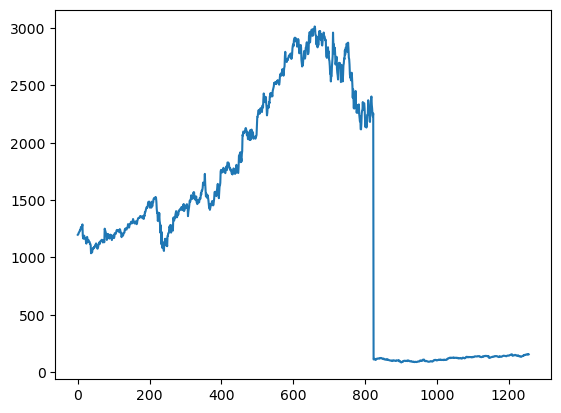

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
##Applying MinMax scaler as LSTMS are sensitive to scale 

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

C:\Users\KIIT\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
print(df1)

[[0.38003337]
 [0.38170874]
 [0.38254814]
 ...
 [0.02486786]
 [0.02335627]
 [0.02403871]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(817, 440)

In [17]:
train_data

array([[0.38003337],
       [0.38170874],
       [0.38254814],
       [0.38706926],
       [0.38817139],
       [0.39022892],
       [0.39337153],
       [0.39338176],
       [0.39763673],
       [0.40299725],
       [0.40007984],
       [0.40262191],
       [0.40560073],
       [0.41085546],
       [0.3770409 ],
       [0.37008008],
       [0.36821363],
       [0.37598995],
       [0.37735141],
       [0.37213421],
       [0.36946248],
       [0.36813515],
       [0.36878005],
       [0.35777923],
       [0.35382453],
       [0.36875958],
       [0.37379934],
       [0.36810785],
       [0.36010632],
       [0.36378464],
       [0.36439542],
       [0.36076146],
       [0.35827058],
       [0.35850261],
       [0.35246648],
       [0.3529749 ],
       [0.34808868],
       [0.32509068],
       [0.33082994],
       [0.32713457],
       [0.32785794],
       [0.33526234],
       [0.34015539],
       [0.33958897],
       [0.33901231],
       [0.3430182 ],
       [0.34185124],
       [0.344

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 150 #Setting timestep as 150 for LSTM prediction
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(666, 150)
(666,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
!pip install tensorflow

In [23]:
!pip install --upgrade tensorflow


In [24]:
!pip install --upgrade numpy

In [25]:
### Creating the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 150, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 150, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 685ms/step - loss: 0.3462 - val_loss: 0.0390
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step - loss: 0.0155 - val_loss: 0.0251
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 453ms/step - loss: 0.0070 - val_loss: 0.0263
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 573ms/step - loss: 0.0049 - val_loss: 0.0208
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 755ms/step - loss: 0.0039 - val_loss: 0.0112
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 542ms/step - loss: 0.0025 - val_loss: 0.0070
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 480ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 525ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 465ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 615ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 11/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 438ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 12/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 490ms/step - loss: 7.0157e-04 - val_loss: 9.4867e-05
Epoch 67/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 481ms/step - loss: 9.6582e-04 - val_loss: 1.6554e-04
Epoch 68/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 524ms/step - loss: 7.4378e-04 - val_loss: 1.1338e-04
Epoch 69/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 663ms/step - loss: 7.1145e-04 - val_loss: 1.1759e-04
Epoch 70/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 520ms/step - loss: 7.1434e-04 - val_loss: 1.0734e-04
Epoch 71/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 470ms/step - loss: 6.9860e-04 - val_loss: 8.3496e-05
Epoch 72/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 584ms/step - loss: 6.9223e-04 - val_loss: 1.2545e-04
Epoch 73/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 481ms/step - loss: 7.6357e-04 - val_loss: 8.7305e-05
Epoch 74/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 551ms/step - loss: 6.6546e-04 - val_loss: 9.0525e-05
Epoch 75/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 483ms/step - loss: 6.6142e-04 - val_loss: 7.7524e-05
Epoch 76/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 446ms/ste

Epoch 129/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 428ms/step - loss: 5.4395e-04 - val_loss: 1.2339e-04
Epoch 130/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - loss: 5.4218e-04 - val_loss: 1.5401e-04
Epoch 131/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 396ms/step - loss: 5.3595e-04 - val_loss: 1.5587e-04
Epoch 132/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 417ms/step - loss: 6.1964e-04 - val_loss: 1.3028e-04
Epoch 133/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step - loss: 5.5362e-04 - val_loss: 2.1945e-04
Epoch 134/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 403ms/step - loss: 5.5173e-04 - val_loss: 1.5329e-04
Epoch 135/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 417ms/step - loss: 5.4999e-04 - val_loss: 1.3281e-04
Epoch 136/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 411ms/step - loss: 5.2087e-04 - val_loss: 1.2753e-04
Epoch 137/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 481ms/step - loss: 5.1863e-04 - val_loss: 1.8024e-04
Epoch 138/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 441ms/step - loss: 5.4765e-04 - val_loss: 1.7504e-04
Epoch 139/150
11/11 ━━━━━━━━━━

In [29]:
### Performing the prediction and checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2098.6554379291206

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

166.22039387650537

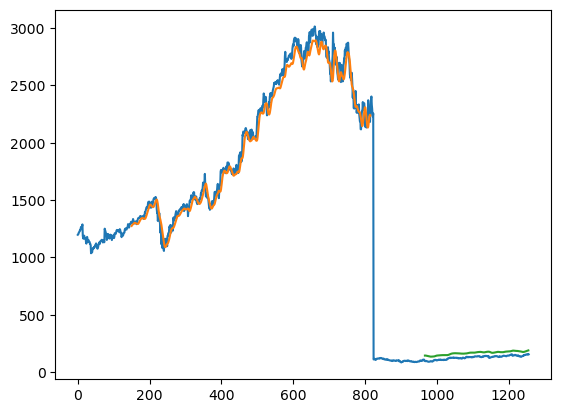

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

440

In [35]:
x_input=test_data[290:].reshape(1,-1)
x_input.shape

(1, 150)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=149
i=0
while(i<30):
    
    if(len(temp_input)>149):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

0 day input [0.01819026 0.01815955 0.01770232 0.01798553 0.01832674 0.018511
 0.01794117 0.01842911 0.01893752 0.01870208 0.01892728 0.01888293
 0.01743617 0.01633404 0.0162965  0.01661042 0.01568231 0.01636816
 0.01693799 0.01650123 0.01763407 0.016996   0.01800941 0.01791387
 0.0188488  0.01911154 0.01900918 0.01986222 0.0193811  0.01879762
 0.01944934 0.01961995 0.01903647 0.01893411 0.01816978 0.01856559
 0.01932309 0.01473373 0.0136316  0.01361795 0.01441981 0.01426626
 0.01504083 0.01538546 0.01599623 0.01636475 0.0166889  0.01698235
 0.01644664 0.01725532 0.01711201 0.01772279 0.01804694 0.01883857
 0.01823803 0.01857242 0.01881127 0.01928897 0.01867478 0.01861678
 0.01881127 0.01805377 0.01720755 0.01700282 0.01608495 0.01668549
 0.01635792 0.01875326 0.01813566 0.0174737  0.01711201 0.01722461
 0.01696188 0.01718025 0.01832333 0.01863384 0.01916613 0.01989634
 0.02021026 0.02024438 0.0197735  0.01971891 0.01959948 0.01913201
 0.01940499 0.01861336 0.01839157 0.01946299 0.02015

4 day output [[0.04016402]]
5 day input [0.018511   0.01794117 0.01842911 0.01893752 0.01870208 0.01892728
 0.01888293 0.01743617 0.01633404 0.0162965  0.01661042 0.01568231
 0.01636816 0.01693799 0.01650123 0.01763407 0.016996   0.01800941
 0.01791387 0.0188488  0.01911154 0.01900918 0.01986222 0.0193811
 0.01879762 0.01944934 0.01961995 0.01903647 0.01893411 0.01816978
 0.01856559 0.01932309 0.01473373 0.0136316  0.01361795 0.01441981
 0.01426626 0.01504083 0.01538546 0.01599623 0.01636475 0.0166889
 0.01698235 0.01644664 0.01725532 0.01711201 0.01772279 0.01804694
 0.01883857 0.01823803 0.01857242 0.01881127 0.01928897 0.01867478
 0.01861678 0.01881127 0.01805377 0.01720755 0.01700282 0.01608495
 0.01668549 0.01635792 0.01875326 0.01813566 0.0174737  0.01711201
 0.01722461 0.01696188 0.01718025 0.01832333 0.01863384 0.01916613
 0.01989634 0.02021026 0.02024438 0.0197735  0.01971891 0.01959948
 0.01913201 0.01940499 0.01861336 0.01839157 0.01946299 0.02015566
 0.02057877 0.02053441 0

9 day output [[0.04857072]]
10 day input [0.01892728 0.01888293 0.01743617 0.01633404 0.0162965  0.01661042
 0.01568231 0.01636816 0.01693799 0.01650123 0.01763407 0.016996
 0.01800941 0.01791387 0.0188488  0.01911154 0.01900918 0.01986222
 0.0193811  0.01879762 0.01944934 0.01961995 0.01903647 0.01893411
 0.01816978 0.01856559 0.01932309 0.01473373 0.0136316  0.01361795
 0.01441981 0.01426626 0.01504083 0.01538546 0.01599623 0.01636475
 0.0166889  0.01698235 0.01644664 0.01725532 0.01711201 0.01772279
 0.01804694 0.01883857 0.01823803 0.01857242 0.01881127 0.01928897
 0.01867478 0.01861678 0.01881127 0.01805377 0.01720755 0.01700282
 0.01608495 0.01668549 0.01635792 0.01875326 0.01813566 0.0174737
 0.01711201 0.01722461 0.01696188 0.01718025 0.01832333 0.01863384
 0.01916613 0.01989634 0.02021026 0.02024438 0.0197735  0.01971891
 0.01959948 0.01913201 0.01940499 0.01861336 0.01839157 0.01946299
 0.02015566 0.02057877 0.02053441 0.02072891 0.02067431 0.02026826
 0.02098482 0.02200164 0

14 day output [[0.05689223]]
15 day input [0.01661042 0.01568231 0.01636816 0.01693799 0.01650123 0.01763407
 0.016996   0.01800941 0.01791387 0.0188488  0.01911154 0.01900918
 0.01986222 0.0193811  0.01879762 0.01944934 0.01961995 0.01903647
 0.01893411 0.01816978 0.01856559 0.01932309 0.01473373 0.0136316
 0.01361795 0.01441981 0.01426626 0.01504083 0.01538546 0.01599623
 0.01636475 0.0166889  0.01698235 0.01644664 0.01725532 0.01711201
 0.01772279 0.01804694 0.01883857 0.01823803 0.01857242 0.01881127
 0.01928897 0.01867478 0.01861678 0.01881127 0.01805377 0.01720755
 0.01700282 0.01608495 0.01668549 0.01635792 0.01875326 0.01813566
 0.0174737  0.01711201 0.01722461 0.01696188 0.01718025 0.01832333
 0.01863384 0.01916613 0.01989634 0.02021026 0.02024438 0.0197735
 0.01971891 0.01959948 0.01913201 0.01940499 0.01861336 0.01839157
 0.01946299 0.02015566 0.02057877 0.02053441 0.02072891 0.02067431
 0.02026826 0.02098482 0.02200164 0.02191293 0.02224391 0.02281374
 0.02393634 0.02398753

19 day output [[0.06467666]]
20 day input [0.01763407 0.016996   0.01800941 0.01791387 0.0188488  0.01911154
 0.01900918 0.01986222 0.0193811  0.01879762 0.01944934 0.01961995
 0.01903647 0.01893411 0.01816978 0.01856559 0.01932309 0.01473373
 0.0136316  0.01361795 0.01441981 0.01426626 0.01504083 0.01538546
 0.01599623 0.01636475 0.0166889  0.01698235 0.01644664 0.01725532
 0.01711201 0.01772279 0.01804694 0.01883857 0.01823803 0.01857242
 0.01881127 0.01928897 0.01867478 0.01861678 0.01881127 0.01805377
 0.01720755 0.01700282 0.01608495 0.01668549 0.01635792 0.01875326
 0.01813566 0.0174737  0.01711201 0.01722461 0.01696188 0.01718025
 0.01832333 0.01863384 0.01916613 0.01989634 0.02021026 0.02024438
 0.0197735  0.01971891 0.01959948 0.01913201 0.01940499 0.01861336
 0.01839157 0.01946299 0.02015566 0.02057877 0.02053441 0.02072891
 0.02067431 0.02026826 0.02098482 0.02200164 0.02191293 0.02224391
 0.02281374 0.02393634 0.02398753 0.0243458  0.02373502 0.01989634
 0.02020685 0.020490

24 day output [[0.07201026]]
25 day input [0.01911154 0.01900918 0.01986222 0.0193811  0.01879762 0.01944934
 0.01961995 0.01903647 0.01893411 0.01816978 0.01856559 0.01932309
 0.01473373 0.0136316  0.01361795 0.01441981 0.01426626 0.01504083
 0.01538546 0.01599623 0.01636475 0.0166889  0.01698235 0.01644664
 0.01725532 0.01711201 0.01772279 0.01804694 0.01883857 0.01823803
 0.01857242 0.01881127 0.01928897 0.01867478 0.01861678 0.01881127
 0.01805377 0.01720755 0.01700282 0.01608495 0.01668549 0.01635792
 0.01875326 0.01813566 0.0174737  0.01711201 0.01722461 0.01696188
 0.01718025 0.01832333 0.01863384 0.01916613 0.01989634 0.02021026
 0.02024438 0.0197735  0.01971891 0.01959948 0.01913201 0.01940499
 0.01861336 0.01839157 0.01946299 0.02015566 0.02057877 0.02053441
 0.02072891 0.02067431 0.02026826 0.02098482 0.02200164 0.02191293
 0.02224391 0.02281374 0.02393634 0.02398753 0.0243458  0.02373502
 0.01989634 0.02020685 0.02049006 0.02096435 0.02112813 0.02156148
 0.02174573 0.022769

29 day output [[0.07894488]]


In [42]:
day_new=np.arange(1,150)
day_pred=np.arange(150,180)

In [45]:
df1.shape

(1257, 1)

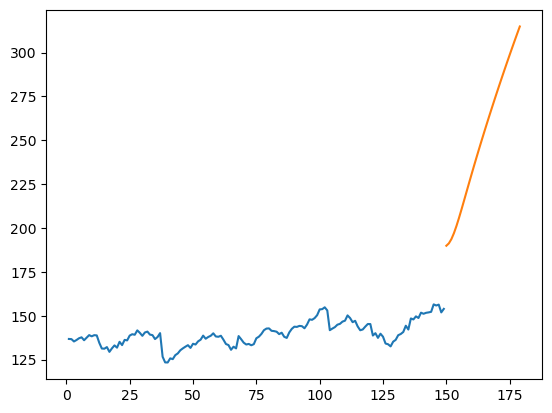

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[1108:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

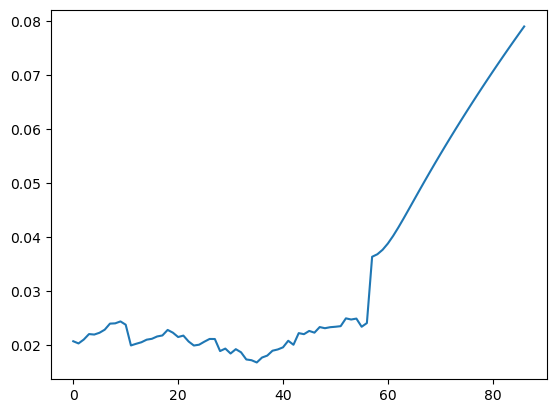

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

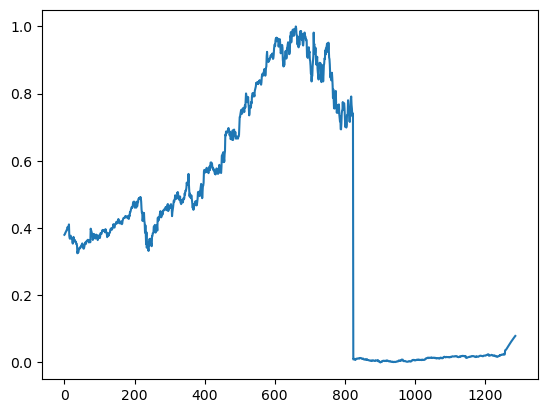

In [49]:
plt.plot(df3)